Data informatiion: Data 1,2,3 & Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import RegexpStemmer,PorterStemmer, LancasterStemmer
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.util import pad_sequence
from nltk.lm.preprocessing import pad_both_ends
# Preprocess the tokenized text for 3-grams language modelling
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE # Maximum Likelihood Estimation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

data1 = "Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties."
print(data1)

data_2 = "The big black dog barked at the white cat and chased away."
print(data_2)
#tokenizing the data
text_corpus = word_tokenize(data1)
data_2_tokenized = word_tokenize(data_2)

data_2_textBlob = TextBlob(data_2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.
The big black dog barked at the white cat and chased away.


# Question 1

1.	Demonstrate word tokenisation using the split function, Regular Expression and NLTK packages separately and report the output.

In [ ]:
#split function
token_split = data1.split()

print("Split Function:")
for i in range(0, len(token_split), 10):
    print(token_split[i:i+10])

Split Function:
['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into']
['two', 'main', 'types:', 'facts', 'and', 'opinions.', 'Facts', 'are', 'objective', 'expressions']
['about', 'entities,', 'events,', 'and', 'their', 'properties.', 'Opinions', 'are', 'usually', 'subjective']
['expressions', 'that', 'describe', 'people’s', 'sentiments,', 'appraisals,', 'or', 'feelings', 'toward', 'entities,']
['events,', 'and', 'their', 'properties.']


In [ ]:
#regular expression
token_reg = re.findall(r'\b\w+\b',data1)

print("Regular Expression:")
for i in range(0, len(token_reg), 10):
    print(token_reg[i:i+10])

Regular Expression:
['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into']
['two', 'main', 'types', 'facts', 'and', 'opinions', 'Facts', 'are', 'objective', 'expressions']
['about', 'entities', 'events', 'and', 'their', 'properties', 'Opinions', 'are', 'usually', 'subjective']
['expressions', 'that', 'describe', 'people', 's', 'sentiments', 'appraisals', 'or', 'feelings', 'toward']
['entities', 'events', 'and', 'their', 'properties']


In [ ]:
#NLTK
tokens = word_tokenize(data1)
print("NLTK:")
for i in range(0, len(tokens), 10):
    print(tokens[i:i+10])

NLTK:
['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into']
['two', 'main', 'types', ':', 'facts', 'and', 'opinions', '.', 'Facts', 'are']
['objective', 'expressions', 'about', 'entities', ',', 'events', ',', 'and', 'their', 'properties']
['.', 'Opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people', '’']
['s', 'sentiments', ',', 'appraisals', ',', 'or', 'feelings', 'toward', 'entities', ',']
['events', ',', 'and', 'their', 'properties', '.']


3. Demonstrate stop words and punctuations removal and report the output suitably along with the stop words found in the given text corpus

In [ ]:
stop_words = set(stopwords.words("english"))

def remove_stopwords_nltk(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_punctuations_regex(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_stopwords_textblob(text):
    blob = TextBlob(text)
    filtered_words = [word for word in blob.words if word.lower() not in stopwords.words("english")]
    return ' '.join(filtered_words)


# Remove stop words using NLTK
result_nltk = remove_stopwords_nltk(data1)
print("NLTK Output:")
for i in range(0, len(result_nltk.split()), 10):
    print(' '.join(result_nltk.split()[i:i+10]))
print("\nStop Words in NLTK:")
print([word for word in nltk.word_tokenize(data1) if word.lower() in stop_words])

# Remove stop words using TextBlob
result_textblob = remove_stopwords_textblob(data1)
print("\nTextBlob Output:")
for i in range(0, len(result_textblob.split()), 10):
    print(' '.join(result_textblob.split()[i:i+10]))
print("\nStop Words in TextBlob:")
print([word for word in TextBlob(data1).words if word.lower() in stop_words])

# Remove punctuations using regex
result_regex = remove_punctuations_regex(data1)
print("\nRegex Output:")
for i in range(0, len(result_regex.split()), 10):
    print(' '.join(result_regex.split()[i:i+10]))

NLTK Output:
Textual information world broadly categorized two main types : facts
opinions . Facts objective expressions entities , events , properties
. Opinions usually subjective expressions describe people ’ sentiments ,
appraisals , feelings toward entities , events , properties .

Stop Words in NLTK:
['in', 'the', 'can', 'be', 'into', 'and', 'are', 'about', 'and', 'their', 'are', 'that', 's', 'or', 'and', 'their']

TextBlob Output:
Textual information world broadly categorized two main types facts opinions
Facts objective expressions entities events properties Opinions usually subjective expressions
describe people ’ sentiments appraisals feelings toward entities events properties

Stop Words in TextBlob:
['in', 'the', 'can', 'be', 'into', 'and', 'are', 'about', 'and', 'their', 'are', 'that', 's', 'or', 'and', 'their']

Regex Output:
Textual information in the world can be broadly categorized into
two main types facts and opinions Facts are objective expressions
about entities ev

# Question 2

2.	Demonstrate word stemming using Regular Expression, Porter Stemmer and Lancaster Stemmer and report the output

In [ ]:

# Stemming using Regular Expression
rs = RegexpStemmer('ing$|able$|ed$|ly$|er$|en$|ish$|ment$|ous$|ion$|al$|ive$|ify$|ful$|less$|ness$|ity$|ual$|ation$|s$', min=3)
print("Regular Expression Output:")
rs_stem = [rs.stem(w) for w in text_corpus]
for i in range(0, len(rs_stem), 10):
    print(rs_stem[i:i+10])

#stemming using Porter Stemmer
ps = PorterStemmer()
print("\nPorter Stemmer Output:")
ps_stem = [ps.stem(w) for w in text_corpus]
for i in range(0, len(ps_stem), 10):
    print(ps_stem[i:i+10])

# Stemming using Lancaster Stemmer
ls = LancasterStemmer()
print("\nLancaster Stemmer Output:")
ls_stem = [ls.stem(w) for w in text_corpus]
for i in range(0, len(ls_stem), 10):
    print(ls_stem[i:i+10])


Regular Expression Output:
['Text', 'inform', 'in', 'the', 'world', 'can', 'be', 'broad', 'categoriz', 'into']
['two', 'main', 'type', ':', 'fact', 'and', 'opinion', '.', 'Fact', 'are']
['object', 'expression', 'about', 'entitie', ',', 'event', ',', 'and', 'their', 'propertie']
['.', 'Opinion', 'are', 'usual', 'subject', 'expression', 'that', 'describe', 'people', '’']
['s', 'sentiment', ',', 'appraisal', ',', 'or', 'feeling', 'toward', 'entitie', ',']
['event', ',', 'and', 'their', 'propertie', '.']

Porter Stemmer Output:
['textual', 'inform', 'in', 'the', 'world', 'can', 'be', 'broadli', 'categor', 'into']
['two', 'main', 'type', ':', 'fact', 'and', 'opinion', '.', 'fact', 'are']
['object', 'express', 'about', 'entiti', ',', 'event', ',', 'and', 'their', 'properti']
['.', 'opinion', 'are', 'usual', 'subject', 'express', 'that', 'describ', 'peopl', '’']
['s', 'sentiment', ',', 'apprais', ',', 'or', 'feel', 'toward', 'entiti', ',']
['event', ',', 'and', 'their', 'properti', '.']

Lanc

# Question 3

1.	Demonstrate POS tagging using NLTK POS tagger, textblob POS tagger and the Regular Expression tagger and report the output.

In [ ]:
# NLTK POS tagger
print("NLTK POS tagger output:")
nltk_pos = nltk.pos_tag(data_2_tokenized)
for i in range(0, len(nltk_pos), 5):
    print(nltk_pos[i:i+5])
print("-" * 200)

# textblob POS tagger
print("Textblob POS tagger output:")
textblob_pos = data_2_textBlob.tags
for i in range(0, len(textblob_pos), 5):
    print(textblob_pos[i:i+5])

# Regular Expression tagger
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*the$', 'DT'),                # the
     (r'.*and$', 'CC'),                # and
     (r'.*', 'NN'),                    # nouns (default)
     (r'^\d+$', 'CD'),
     (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
     (r'.*ment$', 'NN'),               # i.e. wonderment
     (r'.*ful$', 'JJ')                 # i.e. wonderful
 ]

regexp_tagger = nltk.RegexpTagger(patterns)
tagger = nltk.tag.sequential.RegexpTagger(patterns)
print("-" * 200)
print("Regular Expression tagger output:")
reg_pos = tagger.tag(data_2_tokenized)
for i in range(0, len(reg_pos), 5):
    print(reg_pos[i:i+5])

NLTK POS tagger output:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD')]
[('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC')]
[('chased', 'VBD'), ('away', 'RB'), ('.', '.')]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Textblob POS tagger output:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD')]
[('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC')]
[('chased', 'VBD'), ('away', 'RB')]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Regular Expression tagger output:
[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD')]
[('at', 'NN'), ('the', 'DT')

['the', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']



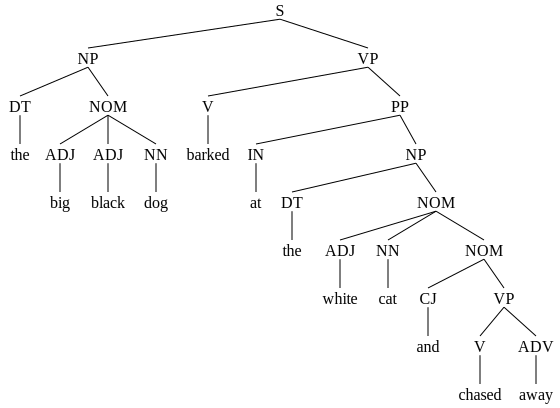

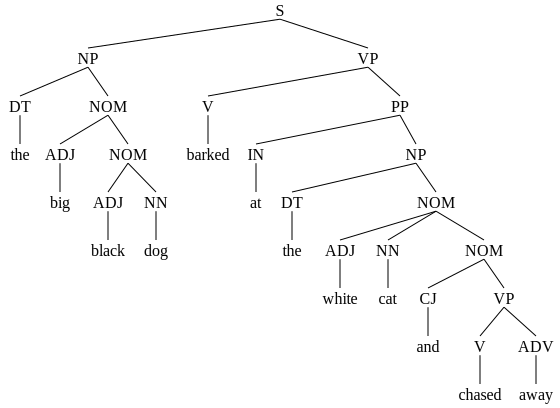

In [ ]:
import nltk
!pip install svgling
from nltk import Tree

# Download the necessary resources (if not already downloaded)
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> DT NOM
NOM -> ADJ NOM | ADJ NN | ADJ ADJ NN | ADJ NN NOM | CJ VP
PP -> IN NP
VP -> V PP | V ADV

V -> 'barked' | 'chased'
DT -> 'the'
ADJ -> 'big' | 'black' | 'white'
NN -> 'dog' | 'cat'
IN -> 'at'
CJ -> 'and'
ADV -> 'away'
""")

data3 = nltk.tokenize.word_tokenize("the big black dog barked at the white cat and chased away")
print(data3)
print()
parser = nltk.ChartParser(grammar)
for tree1 in parser.parse(data3):
  display(tree1)

#Question 4

[link text](https://)3.	Implement in python using both unsmoothed and smoothed bigram language models and report the respective sentence probabilities.

Unsmoothed Bigram Model

In [ ]:
import nltk
from nltk.util import bigrams
from collections import Counter

# Sample sentences
sentences = [
    "He read a book",
    "I read a different book",
    "He read a book by Danielle"
]

# Tokenize each sentence and generate bigrams
corpus_bigrams = []
corpus_unigrams = []
for sentence in sentences:
    # Tokenize the sentence
    tokens = nltk.tokenize.word_tokenize(sentence.lower())

    # Add padding to the tokens
    padded_tokens = ['<s>'] + tokens + ['</s>']

    # Generate bigrams
    bigram_tokens = list(bigrams(padded_tokens))

    # Add bigrams and unigrams to corpus
    corpus_bigrams.extend(bigram_tokens)
    corpus_unigrams.extend(padded_tokens)

# Count occurrences of each bigram and unigram
bigram_counts = Counter(corpus_bigrams)
unigram_counts = Counter(corpus_unigrams)

# Tokenize the sentence to calculate its probability
sentence = "I read a book by Danielle"
tokens = nltk.tokenize.word_tokenize(sentence.lower())
padded_tokens = ['<s>'] + tokens + ['</s>']
sentence_bigrams = list(bigrams(padded_tokens))

# Calculate sentence probability
sentence_probability = 1.0
for bigram in sentence_bigrams:
    preceding_word_count = unigram_counts[bigram[0]]  # Count of the preceding word in the bigram
    if preceding_word_count > 0:
        bigram_probability = bigram_counts[bigram] / preceding_word_count
        sentence_probability *= bigram_probability
    else:
        # If the preceding word count is 0, set the sentence probability to 0
        sentence_probability = 0.0
        break

print("Sentence Probability:", sentence_probability)


Sentence Probability: 0.07407407407407407


Smoothed Bigram Model

In [ ]:
import nltk
from nltk.util import bigrams
from collections import Counter

# Sample sentences
sentences = [
    "He read a book",
    "I read a different book",
    "He read a book by Danielle"
]

# Tokenize each sentence and generate bigrams
corpus_bigrams = []
corpus_unigrams = []
for sentence in sentences:
    # Tokenize the sentence
    tokens = nltk.tokenize.word_tokenize(sentence.lower())

    # Add padding to the tokens
    padded_tokens = ['<s>'] + tokens + ['</s>']

    # Generate bigrams
    bigram_tokens = list(bigrams(padded_tokens))

    # Add bigrams and unigrams to corpus
    corpus_bigrams.extend(bigram_tokens)
    corpus_unigrams.extend(padded_tokens)

# Count occurrences of each bigram and unigram
bigram_counts = Counter(corpus_bigrams)
unigram_counts = Counter(corpus_unigrams)

# Calculate vocabulary size
vocabulary_size = len(set(corpus_unigrams))

# Calculate smoothed bigram probabilities
smoothed_bigram_probabilities = {}
for bigram in bigram_counts:
    preceding_word_count = unigram_counts[bigram[0]]  # Count of the preceding word in the bigram
    smoothed_probability = (bigram_counts[bigram] + 1) / (preceding_word_count + vocabulary_size)
    smoothed_bigram_probabilities[bigram] = smoothed_probability

# Tokenize the sentence to calculate its probability
sentence = "I read a book by Danielle"
tokens = nltk.tokenize.word_tokenize(sentence.lower())
padded_tokens = ['<s>'] + tokens + ['</s>']
sentence_bigrams = list(bigrams(padded_tokens))

# Calculate sentence probability using the smoothed bigram model
sentence_probability = 1.0
for bigram in sentence_bigrams:
    if bigram in smoothed_bigram_probabilities:
        bigram_probability = smoothed_bigram_probabilities[bigram]
        sentence_probability *= bigram_probability
    else:
        # If the bigram is unseen, apply Laplace smoothing with a count of 1
        preceding_word_count = unigram_counts[bigram[0]]
        smoothed_probability = 1 / (preceding_word_count + vocabulary_size)
        sentence_probability *= smoothed_probability

print("Sentence Probability:", sentence_probability)


Sentence Probability: 1.0101357919757919e-05


In [ ]:
def calculate_sentence_probability(corpus, sentence, smoothing=False):
  """
  Calculates the probability of a sentence using bigram language model.

  Args:
    corpus: A list of strings representing the training corpus.
    sentence: The sentence for which to calculate the probability.
    smoothing: Whether to use smoothing (Add-1 smoothing)

  Returns:
    The probability of the sentence.
  """
  words = sentence.split()
  if len(words) == 0:
    return 0

  # Calculate bigram counts
  bigram_counts = {}
  unigram_counts = {}
  for line in corpus:
    line_words = line.split()
    for i in range(len(line_words) - 1):
      bigram = (line_words[i], line_words[i+1])
      unigram = line_words[i]
      if bigram in bigram_counts:
        bigram_counts[bigram] += 1
      else:
        bigram_counts[bigram] = 1
      if unigram in unigram_counts:
        unigram_counts[unigram] += 1
      else:
        unigram_counts[unigram] = 1

  # Calculate sentence probability
  probability = 1.0
  for i in range(1, len(words)):
    bigram = (words[i-1], words[i])
    if smoothing:
      # Add-1 smoothing
      count = bigram_counts.get(bigram, 0) + 1
      denominator = unigram_counts.get(words[i-1], 0) + len(unigram_counts)
    else:
      count = bigram_counts.get(bigram, 0)
      denominator = unigram_counts.get(words[i-1], 0)
    if denominator == 0:
      probability = 0
      break
    probability *= (count / denominator)

  return probability

# Training corpus
corpus = [
  "He read a book",
  "I read a different book",
  "He read a book by Danielle",
]

# Sentence to evaluate
sentence = "I read a book by Danielle"

# Unsmoothed bigram probability
unsmoothed_probability = calculate_sentence_probability(corpus, sentence)
print("Unsmoothed bigram probability:", unsmoothed_probability)

# Smoothed bigram probability
smoothed_probability = calculate_sentence_probability(corpus, sentence, smoothing=True)
print("Smoothed bigram probability:", smoothed_probability)


Unsmoothed bigram probability: 0.6666666666666666
Smoothed bigram probability: 0.001875
